In [14]:
from typing import Union, Optional
import numpy as np
from numpy import sqrt
import matplotlib
from scipy.stats import norm
# matplotlib.use('Qt5Agg') # needs the pyqt package, crazy cpu usage sometimes but better behaved than MacOSX
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.transforms import Affine2D

# to see your plot config
print(f'matplotlib backend: {matplotlib.get_backend()}')
print(f'matplotlib config file: {matplotlib.matplotlib_fname()}')
print(f'matplotlib config dir: {matplotlib.get_configdir()}')
plt.close('all')

# Not available at conda, Needs to installed with "pip install SciencePLots" (https://github.com/garrettj403/SciencePlots.git)
# plt.style.use(['science', 'grid', 'ieee', 'bright'])

# Type alias for type hinting (PEP 484 -- Type Hints: https://www.python.org/dev/peps/pep-0484/)
Color = Union[tuple, str]

matplotlib backend: module://ipykernel.pylab.backend_inline
matplotlib config file: /home/martin/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
matplotlib config dir: /home/martin/.config/matplotlib


In [15]:
# function declarations
def plot_cov_ellipse2d(
        ax: plt.Axes = None,
        mean: np.ndarray = np.zeros(2),
        cov: np.ndarray = np.eye(2),
        n_sigma: float = 1,
        *,
        edgecolor: Color = 'C0',
        facecolor: Color = 'none',
        **kwargs,  # other Ellipse keyword arguments
        ) -> Optional[Ellipse]:
    """Plot a n_sigma covariance ellipse centered in mean into ax."""
    if ax is None:
        ax = plt.gca()

    if mean is None or cov is None:
        print('None parameters not handled: ellipse not plotted')
        return
    ell_trans_mat = np.zeros((3, 3))
    ell_trans_mat[:2, :2] = np.linalg.cholesky(cov)
    ell_trans_mat[:2, 2] = mean
    ell_trans_mat[2, 2] = 1

    ell = Ellipse((0.0, 0.0), 2.0*n_sigma, 2.0*n_sigma, edgecolor=edgecolor, facecolor=facecolor, **kwargs)
    trans = Affine2D(ell_trans_mat)
    ell.set_transform(trans + ax.transData)
    return ax.add_patch(ell)



In [4]:
# %% initialize the values
x_bar = np.zeros(2)
P = 25 * np.eye(2)

H_r = np.eye(2)
H_c = np.eye(2)

R_r = np.array([[79, 36], [36, 36]])
R_c = np.array([[28, 4], [4, 22]])

z_c = np.array([2, 14])
z_r = np.array([-4, 6])


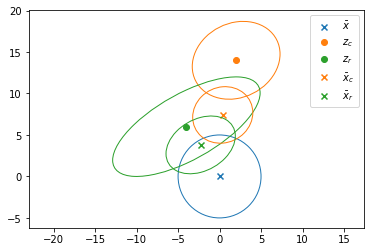

In [18]:
# %% Plot initial 1 sigma ellipses
fig1, ax1 = plt.subplots(num=1, clear=True)

# make and plot ellipse
plot_cov_ellipse2d(ax1, x_bar, P, edgecolor='C0')
ax1.scatter(*x_bar, c='C0', marker='x', label=r'$\bar x$') 

# plot measurements
ax1.scatter(*z_c, c='C1', label='$z_c$')
plot_cov_ellipse2d(ax1, z_c, R_c, edgecolor='C1')

ax1.scatter(*z_r, c='C2', label='$z_r$')
plot_cov_ellipse2d(ax1, z_r, R_r, edgecolor='C2')



# % make the functions to condition
def condition_mean(x, z, P, H, R):
    # Hints: numpy.linalg, use @ for matrix multiplication (* is elementwise)
    ans = x+P@np.transpose(H)@np.linalg.inv(H@P@np.transpose(H)+R)@(z-H@x)
    return ans


def condition_cov(P, H, R):
    # Hints: numpy.linalg, use @ for matrix multiplication (* is elementwise)
    ans = P-P@np.transpose(H)@np.linalg.inv(H@P@np.transpose(H)+R)@P@H
    return ans

# % task 5 (f)
x_bar_c = condition_mean(x_bar,z_c,P,H_c,R_c)
P_c = condition_cov(P,H_c,R_c)

x_bar_r = condition_mean(x_bar,z_r,P,H_r,R_r)
P_r = condition_cov(P,H_r,R_r)

# plot conditioned states
plot_cov_ellipse2d(ax1, x_bar_c, P_c, edgecolor='C1')
ax1.scatter(*x_bar_c, c='C1', marker='x', label=r'$\bar x_c$')

plot_cov_ellipse2d(ax1, x_bar_r, P_r, edgecolor='C2')
ax1.scatter(*x_bar_r, c='C2', marker='x', label=r'$\bar x_r$')

ax1.axis('equal')
ax1.legend()

plt.show(block=False)

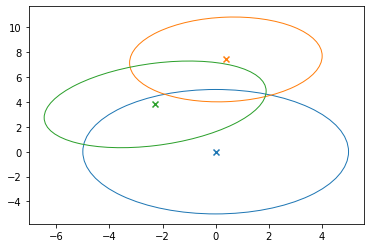

In [7]:
fig2, ax2 = plt.subplots(num=2, clear=True)
plot_cov_ellipse2d(ax2, x_bar, P, edgecolor='C0')
ax2.scatter(*x_bar, c='C0', marker='x', label=r'$\bar x$')

plot_cov_ellipse2d(ax2, x_bar_c, P_c, edgecolor='C1')
ax2.scatter(*x_bar_c, c='C1', marker='x', label=r'$\bar x_c$')

plot_cov_ellipse2d(ax2, x_bar_r, P_r, edgecolor='C2')
ax2.scatter(*x_bar_r, c='C2', marker='x', label=r'$\bar x_r$')

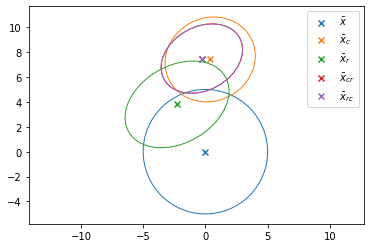

In [11]:
ax2.scatter(*z_c, c='C1', label='$z_c$')
plot_cov_ellipse2d(ax2, z_c, R_c, edgecolor='C1')

ax2.scatter(*z_r, c='C2', label='$z_r$')
plot_cov_ellipse2d(ax2, z_r, R_r, edgecolor='C2')

ax2.axis('equal')
ax2.legend()
plt.show(block=False)

# % task 5 (g)
x_bar_cr = condition_mean(x_bar_c,z_r,P_c,H_r,R_r)
P_cr = condition_cov(P_c,H_r,R_r)

x_bar_rc = condition_mean(x_bar_r,z_c,P_r,H_c,R_c)
P_rc = condition_cov(P_r,H_c,R_c)

# % Plot 1 sigma ellipses

fig3, ax3 = plt.subplots(num=3, clear=True)

plot_cov_ellipse2d(ax3, x_bar, P, edgecolor='C0')
ax3.scatter(*x_bar, c='C0', marker='x', label=r'$\bar x$')

plot_cov_ellipse2d(ax3, x_bar_c, P_c, edgecolor='C1')
ax3.scatter(*x_bar_c, c='C1', marker='x', label=r'$\bar x_c$')

plot_cov_ellipse2d(ax3, x_bar_r, P_r, edgecolor='C2')
ax3.scatter(*x_bar_r, c='C2', marker='x', label=r'$\bar x_r$')

plot_cov_ellipse2d(ax3, x_bar_cr, P_cr, edgecolor='C3')
ax3.scatter(*x_bar_cr, c='C3', marker='x', label=r'$\bar x_{cr}$')

plot_cov_ellipse2d(ax3, x_bar_rc, P_rc, edgecolor='C4')
ax3.scatter(*x_bar_rc, c='C4', marker='x', label=r'$\bar x_{rc}$')
ax3.axis('equal')
ax3.legend()

Probability that it is above x_2 = x_1 + 5 is None
None parameters not handled: ellipse not plotted


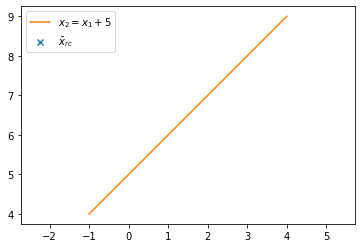

In [9]:
ax3.scatter(*z_c, c='C1', label='$z_c$')
plot_cov_ellipse2d(ax3, z_c, R_c, edgecolor='C1')

ax3.scatter(*z_r, c='C2', label='$z_r$')
plot_cov_ellipse2d(ax3, z_r, R_r, edgecolor='C2')

# % true value
ax3.scatter(-5, 12, c='C6', marker='^', label='$x$')


ax3.axis('equal')
ax3.legend()

# % task 5 (h)
line_normal = None  # TODO
line_position = 5
xi_mean = None  # TODO
xi_cov = None  # TODO
prob_above_line = None  # TODO: hint: norm.sf(...).squeeze() or norm.cdf(...).squeeze()

print(f'Probability that it is above x_2 = x_1 + 5 is {prob_above_line}')
fig4, ax4 = plt.subplots(num=4, clear=True)
plot_cov_ellipse2d(ax4, x_bar_cr, P_cr, edgecolor='C0')
ax4.scatter(*x_bar_cr, marker='x', c='C0', label=r'$\bar x_{rc}$')
ax4.plot([-1, 4], [4, 9], color='C1', label='$x_2 = x_1 + 5$')

ax4.axis('equal')
ax4.legend()
